# Lesson 1: Qubits, Superposition and the Bloch Sphere

_course: quantum cryptography for beginners
<br>date: 27 august 2024
<br>author: burton rosenberg_

---

**This lesson discuses,**

- the qubit in both state vector and Bloch sphere understandings,
- superposition and measurements in the computational basis using the Hadamard gate
- the X, Y and Z basis and associated X, Y and Z Pauli matrices
- has some personal and philosophical notes
- assigns exercises

Included in this is some quiskit/python/jupyter examples, and the quiskit documentation.



### Imports

Note that you have qiskit 1.0 installed. This is a breaking change from qiskit 0.0; be careful with internet advice.

In [2]:
import qiskit
import time, math
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector  
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_bloch_vector
from IPython.display import display, Math

print(f'\nqiskit version: {qiskit.version.get_version_info()}\n')


qiskit version: 1.1.2



### Qubits and the Bloch Sphere

Quantum computation in the model we are considering, is the construction of quantum circuits out of quantum gates. The inputs and output to the gates a quantum bits, called qubits. 

A classical bit is an abstraction of a choice of one of two states, often thought of as True and False. Gates on classical bits implement the logical functions of and, or and not. These are the operations in a boolean algebra where the elements of computation are of value True or False, and a basic set of operations are provided, 
- &and;: logical and, x&and;y if and only if both x and y are true.
- &or;: logical or, x&or;y if and only if either or both x and y are true.
- &not; logical not, &not;x, if and only if x is false.
 
A classical circuit is made by connecting the outputs of gates to the inputs of others with wires. The bit information travels through the wires and gates, traditionally from left ot right, calculating according to the gate type. This is the gate model of computation. 
All classical computers are built from those basic gates combined over a billion times in billions of ways. The gate model is enhanced with memory so that circuits can be reused in timesteps.

A discussion of [And-Or-Invert gates](https://en.wikipedia.org/wiki/AND-OR-invert) will hopefuly give you an idea of classical circuits, and the interplay with boolean logic.

Quantum computation takes this as a model idea, but uses quantum bits, or qubits, and quantum gates. Classical systems have two states which are deterministic and always observable. A bit that reads true is true. On the quantum level, a system with two quantum levels can exist in a superposition of those two levels. Quantum states are solutions to then Schödinger's equation, which necessarily expresses the solutions with complex numbers. A measurement is necesserialy a real number, hence these states are not directly observable. 

A qubit is a vector in $\mathbb{C}^2$ of the form,

- $\alpha\,|0\rangle +\beta\,|1\rangle,$

where $\alpha, \beta$ are complex numbers of unit length. Hence the vector is a point on a unit radius 
sphere, and can be represented on such a device, called the Bloch sphere.

The meaning of this representation is not so much a mix of the zero and one state, but a <u>superposition</u> of those states. 
Given that we wish to observe this qubit, and measure it in the <u>computational basis</u>, that is, set up our measuring
appartus to describe the qubit as being either in the $|0\rangle$ or the $|1\rangle$ state,

- The measurement will be $|0\rangle$ with probability $||\alpha||^2$, and after the measurement the qubit will be in the $|0\rangle$ state,
- The measurement will be $|1\rangle$ with probability $||\beta||^2$, and after the measurement the qubit will be in the $|1\rangle$ state,

This is know as the <u>Born Rule</u>.

- Please read [From State Vectors to Bloch Spheres](https://github.com/csc-courses/csc685/blob/master/edition-251/bloch-sphere.ipynb)

Note that the Bloch sphere representation has these happy defects, 

- It discards one dimension of information carried by the qubit, the *global phase*. The global phase is not observable, so in use this representational confusion is a benefit,
- While the basis states $|0\rangle$ and $|1\rangle$ are geometrically orthogonal, the Bloch sphere shows them as antipodal. However this corresponds to the intuition of qubit implementation, such as using quantum spin of a Fermion, whose two states are up or down.



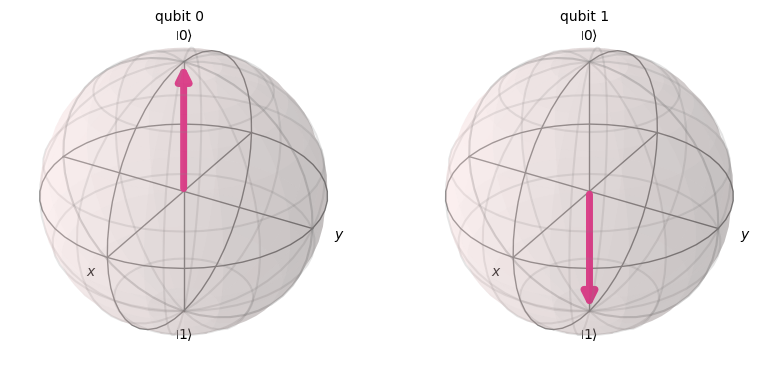

In [2]:
qc = QuantumCircuit(2)
c1 = qc.x(1)
plot_bloch_multivector(qc)

### The Hadamard gate

The behavoir of the non-superimposed states $|0\rangle$ and $|1\rangle$ is almost classical. When observed, a $|0\rangle$ measures zero and a $|1\rangle$ measures one. Note that these states lie along the Z axis, and so the measurement is said to be along the Z axis, and the qubits will be invariant to the Z gate, described later.

A state of superposition (with respect to Z measurements) exists for the other states. We look at the $|+\rangle$ state, that lies along the X axis, and its negation the $|-\rangle$ state. These states do not have a definite result when measured (in the Z basis), but will collapse to the $|0\rangle$ or the $|1\rangle$ state on measurement, the measurement result will be 0 or 1 respectively, and will do so choosing with equal probabily one of the two outcomes.

John Watrus' [IBM tutorial](https://learning.quantum.ibm.com/course/basics-of-quantum-information/single-systems) attempts to ease the conceptual transition by comparing the quantum $|+\rangle$ state to a probabilistic classical state that tosses a coin whether it is zero or one. An important difference is the quantum superposition has complex coefficients whose magnitudes add to one, while the classical but probabilistic states have real, non-negative coefficients that sum to one. 

This returns to the important quantum distinction that quantum lives in the field of complex numbers, but we can only make real valued measurements.

- probabilistic classical: $\frac{1}{{2}}\,|0\rangle + \frac{1}{{2}}\,|1\rangle$
- quantum superposition: $|+\rangle = \frac{1}{\sqrt{2}}\,|0\rangle + \frac{1}{\sqrt{2}}\,|1\rangle$

I am not sure how helpful this approach is, however I certainly appreciate the use of probabilistic classical bits, as a lot of advances in computation are about the space cleared when probabilistic computation is considered, for instance, Probabilistically Checkable Proofs.

However, this science simile does highlight important distinctions between quantum and classical. We discuss this in the (not so) widely known device, **Schödinger's Unicorn**. 

Unicorns are either pink or teal. A classical plus state unicorn is a box of Unicorns, half pink, half teal, where a measurement is an *experiment* (in the sense of probabilty theory) drawing one Unicorn from the box. It is either pink or teal, and it was always pink or teal.

In comparison, a quantum plus state unicorn is a single unicorn in the box, not yet either pink or teal but a superposition of pink and teal. When observed it *becomes* pink or teal. This meaning of "being" is that repeated mesurements after the first yield consistently the same color. One might believe that a pink (or teal) unicorn was in the box all along. Who could doubt the existence of a pink unicorn in a box? But that is not the case. Before the first observation, the observation could have yeilded a pink or a teal Unicorn with equal probability. Now, this might seem to be only a matter of philsophy, but there's proof.

In addition, the reason why it is either pink or teal is because we have it in our minds that these are the colors that unicorns are, and setup to observe accordingly. If we imagined a different color pair for unicorns, we would setup differently. The unicorn would then be observed as one of those two colors, with a possible uncertainty before the measurement, and a certainty after the measurement.

To achieve the plus state vector, an effort of some sort is applied upon the $|0\rangle$ valued qubit, to evolve it into the $|+\rangle$ state. In gate models quantum computation this is abstracted as an gate called the Hadamard gate, or H gate for short.

### State Vector representation


In [3]:
qc = QuantumCircuit(1)
qc.h(0)
sv = Statevector(qc)
sv.draw('latex')

<IPython.core.display.Latex object>

### Block Sphere Representation


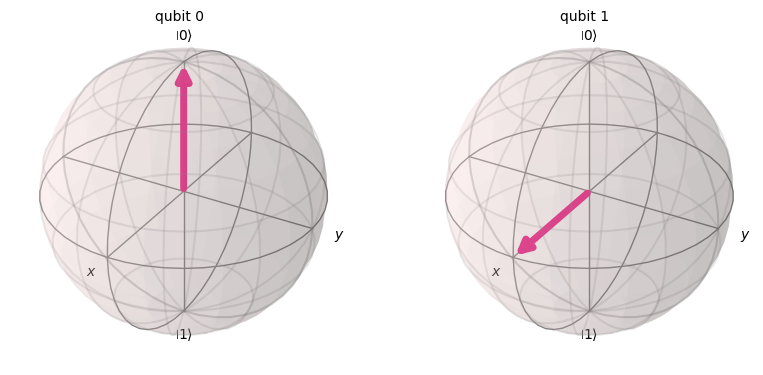

In [4]:
qc = QuantumCircuit(2)
qc.h(1)
plot_bloch_multivector(qc)

### Measurement outcomes in the Z basis

In [26]:
qc = QuantumCircuit(1)
qc.h(0)
sv = Statevector(qc)
print("the color of the unicorn is:\n\t", end=" ")
for i in range(12):
    if sv.measure()[0]=='0':
        print(f'pink', end=" ")
    else:
        print(f'teal', end=" ")
print()

the color of the unicorn is:
	 pink pink pink teal pink teal pink pink teal pink teal teal 


### Some Personal Acknowledgements

The Hadamard Gate was named after Jaques Hadamard (1865&ndash;1963) a French mathematcian that briefly taught at Columbia University in New York City. I am personally grateful to Columbia University for my Master's program, where I was influenced by these professors of my courses,

- database with Moshe Zloof,
- theory of computation with Dexter Kozen,
- control theory with Richard Longman,
- classical logic with Wilfried Sieg,
- and my thesis advise, Zvi Galil.



### The Observer: X, Y and Z basis

I have introduced the H gate first in order to motivate the discussion of superposition. Reference was made the the Z basis, whose measurement direction determined the superpostion. A $|0\rangle$ state as not in superposition but a $|+\rangle$ was, and this is because we are measuring in the Z basis, also known as the *computational basis*. There are two other simple directions to measure, along the X and the Y axes.

The X basis vectors are given the special names, plus and minus, they are logical negations of each other
given the proper negation operator. We have not yet introduced the $|-\rangle$ state, so here it is,

- $|-\rangle = \frac{1}{\sqrt{2}}\,|0\rangle - \frac{1}{\sqrt{2}}\,|1\rangle$

As previously seen, we prepare the $|+\rangle$ state with an H gate, and the $|-\rangle$ gate is also prepared with the H gate, but with the inverted input, 

- $H\,|0\rangle = |+\rangle$
- $H\,|1\rangle = |-\rangle$

Associated with the X basis is the Pauli X gate. The X gate is a half rotation around the X axis, and therefore have these two geometricaly undertandable actions.

First, the fix the $|+\rangle$ and $|-\rangle$ states, as they are on the axis of rotation,

- $X\,|+\rangle=|+\rangle$ and $X\,|-\rangle= - |-\rangle$

and second, the swap the $|0\rangle$ and $|1\rangle$ states, as they are orthogonal to the axis of rotation, and half a rotation apart,

- $X\,|0\rangle=|1\rangle$ and $X\,|1\rangle=|0\rangle$.

<div style="border:black solid thin;margin:1em;padding:1em;width:75%;">
The Pauli X operator <b>fixes</b> the plus and minus states, and <b>inverts</b> the zero and one states. 
</div>

The final basis is the Y basis, which in statevector notation are,

- $|+i\rangle = \frac{i-1}{{2}}\,|0\rangle + \frac{i+1}{{2}}\,|1\rangle$
- $|-i\rangle = \frac{i+1}{{2}}\,|0\rangle + \frac{i-1}{{2}}\,|1\rangle$

and are prepared by a "half not" using the inverse of the square root of the X operator which rotates a quarter turn around the X axis, 

- $|+i\rangle = \sqrt{X}^{-1}\,|0\rangle$,
- $|-i\rangle = \sqrt{X}^{-1}\,|1\rangle$,

**References:**

- [Qiskit H Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate)
- [Qiskit X Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.XGate)
- [Qiskit SXdg Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.SXdgGate)



In [9]:
qc = QuantumCircuit(1)
qc.h(0)
sv = Statevector(qc)
x_zero = sv.draw('latex')

qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
sv = Statevector(qc)
x_one = sv.draw('latex')

qc = QuantumCircuit(1)
qc.sxdg(0)
sv = Statevector(qc)
y_zero = sv.draw('latex')

qc = QuantumCircuit(1)
qc.x(0)
qc.sxdg(0)
sv = Statevector(qc)
y_one = sv.draw('latex')

from IPython.display import display,  Math
display(Math(r'|+\rangle='), x_zero, Math(r'|-\rangle='),x_one, 
        Math(r'|+i\rangle='),y_zero, Math(r'|-i\rangle='),y_one)


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

### The Pauli Operators

We have introduced the Pauli X gate as the gate that fixes the X basis states $|+\rangle$, $|-\rangle$ 
and inverts the Z basis states, $|0\rangle$, $|1\rangle$. It also acts to invert the pairs 
along the Y basis $|+i\rangle$, $|-i\rangle$.

We will show this for the X gate and leave as an exercise the same for the Y and Z gates, and also to consider
compositions of operators such as XY, where first the Y operator is performed and then the X operator. As a 
preview, the result is iZ, the same as if a Z operator is performed with a change in the global phase by the pure complex number i.

Operators are linear, so an operator applied to a sum of states is the sum of the operator applied to each state. That is, 
the operations of the operator and addition commute. Scaler multiples commute with the operator as well. Using this
properties we can perform calculations like the following, which prove from the swap property of the X gate, that it
fixes the plus and minus states.

$$
\begin{eqnarray}
X\,|+\rangle &=& X\,\bigl( \frac{1}{\sqrt{2}}\,|0\rangle + \frac{1}{\sqrt{2}}\,|1\rangle\bigr)\\
&=& X\,\frac{1}{\sqrt{2}}\,|0\rangle + X\,\frac{1}{\sqrt{2}}\,|1\rangle\\
&=& \frac{1}{\sqrt{2}}\,X\,|0\rangle + \frac{1}{\sqrt{2}}\,X\,|1\rangle\\
&=& \frac{1}{\sqrt{2}}\,|1\rangle + \frac{1}{\sqrt{2}}\,|0\rangle\\
&=& |+\rangle
\end{eqnarray}
$$

where the first two steps are by operator linearity, the third step by the definition of the X operator, and the final step by the commutativity of addition. 

$$
\begin{eqnarray}
X\,|-\rangle &=& X\,\bigl( \frac{1}{\sqrt{2}}\,|0\rangle - \frac{1}{\sqrt{2}}\,|1\rangle\bigr)\\
&=& \frac{1}{\sqrt{2}}\,X\,|0\rangle - \frac{1}{\sqrt{2}}\,X\,|1\rangle\\
&=& \frac{1}{\sqrt{2}}\,|1\rangle - \frac{1}{\sqrt{2}}\,|0\rangle\\
&=& - |-\rangle
\end{eqnarray}
$$

**References:**

- [Pauli Operators](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.Pauli)
- [Qiskit X Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.XGate)
- [Qiskit Y Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.YGate)
- [Qiskit Z Gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.ZGate)


### Experiments: Pauli X

There are four versions of the experiment. The notepad will pause for you to input X, Y or Z.

Respond with X, Y or Z to choose experiment


>  X



The four experiments are |+>, X |+>, |->, X |->




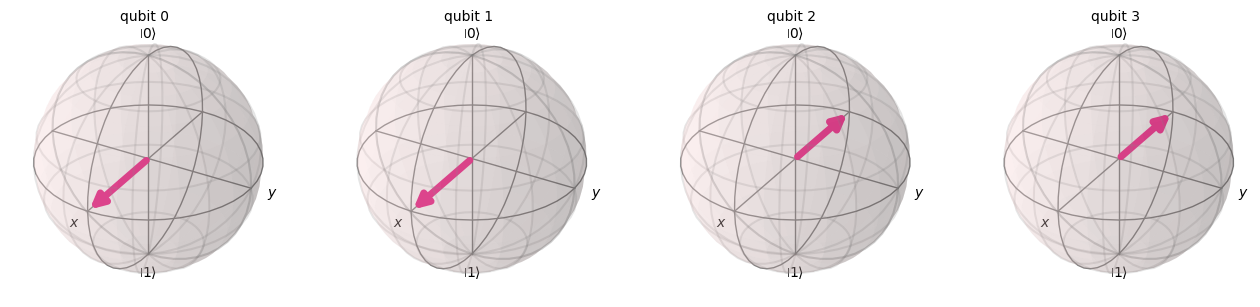

In [10]:
print("Respond with X, Y or Z to choose experiment")
exp = input('> ')

exp_x, exp_y, exp_z = False, False, False
if exp=='X' or exp=='x':
    exp_x = True
if exp=='Y' or exp=='y':
    exp_y = True
if exp=='Z' or exp=='z':
    exp_z = True

qc = QuantumCircuit(4)

if exp_x:
    for i in range(2):
        qc.h(i)
    qc.x(1)
    for i in range(2,4):
        qc.x(i)
        qc.h(i)
    qc.x(3)
    print("\nThe four experiments are |+>, X |+>, |->, X |->\n\n") 

if exp_z: # experiment 0/1
    qc.x(1)
    qc.x(2)
    qc.x(3)
    qc.x(3)
    print("\nThe four experiments are |0>, X |0>, |1>, X |1>\n\n") 


if exp_y: # experiment 0/1
    qc.sxdg(0)
    qc.sxdg(1)
    qc.x(1)
    qc.x(2)
    qc.sxdg(2)
    qc.x(3)
    qc.sxdg(3)
    qc.x(3)
    print("\nThe four experiments are |i>, X |i>, |-i>, X |-i>\n\n") 

plot_bloch_multivector(qc)

### H gate revisted

Because the $H |0\rangle = |+\rangle$ and $H |1\rangle= |-\rangle$, the on might suspect the $H$ gate of being the square root of the Pauli $Y$ operator. However $HH=I$. So the $H$ gate is a $\pi$ revolution around some axis. The exercises will experiement to see what axis is fixed by $H$. 


## End of Page